# Strategy Class

In [40]:
### Main libraries
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime
from coinapi_rest_v1 import CoinAPIv1
from logins import CoinAPI_KEY
from robin_helperfunctions import round_to_hour
from talib import MACD

from robinhoodstrategy import cryptoStrategy, BackcastStrategy, Trade

___
### Testing

In [41]:
test_strategy = cryptoStrategy('MACD')

In [42]:
def entry_exit_func(hist_data, position_flag, trade=None):
    
    # MACD
    FAST, SLOW, SIGNAL = 12, 26, 9
    
    exp1 = hist_data['close'].ewm(span=FAST, adjust=False).mean()
    exp2 = hist_data['close'].ewm(span=SLOW, adjust=False).mean()
    macd = exp1-exp2
    signal = macd.ewm(span=SIGNAL, adjust=False).mean()
    macd_current, signal_current = macd[-1], signal[-1]

    
    if position_flag:
        if macd_current <= signal_current:
            return 'sell'
        else:
            return 'pass'
    elif macd_current > signal_current:
            return 'buy'
    else:
        return 'pass'
test_strategy.add_entryExit_conditions(entry_exit_func)

In [43]:
backtest = BackcastStrategy(test_strategy)
backtest.set_parameters(2500, 'XETHZUSD', '240', 1, 39)
backtest.run_backcast()

Running backcast. Staring with $2500


In [63]:
backtest.trades.set_index('trade_start').resample('M').mean()

,peirods,buy_price,sell_price,pct_change,highest_gain,max_drawdown,current_capital,winning_trade
trade_start,,,,,,,,
2020-08-31 00:00:00-05:00,18.000000,395.205000,414.145000,0.049749,0.128921,-0.010790,2563.995859,0.500000
2020-09-30 00:00:00-05:00,20.000000,355.847500,362.655000,0.019374,0.054635,-0.015252,2894.707782,0.750000
2020-10-31 00:00:00-05:00,11.571429,375.467143,380.098571,0.012772,0.036994,-0.003814,3094.420855,0.428571
2020-11-30 00:00:00-06:00,16.000000,465.806667,502.653333,0.076867,0.117652,-0.002898,3834.815879,0.666667
2020-12-31 00:00:00-06:00,7.500000,571.915000,569.775000,-0.003230,0.017744,-0.009998,4719.614816,0.250000


In [46]:
backtest.backcast_results()


                # Wins: 12

                Average Win: 0.07660768230887864

                # Losses: 11

                Average Loss: -0.018601229095336316

                Win %: 0.5217391304347826

                Overall return: 2323.7793664018473

                Percent return: 0.9295117465607389

                


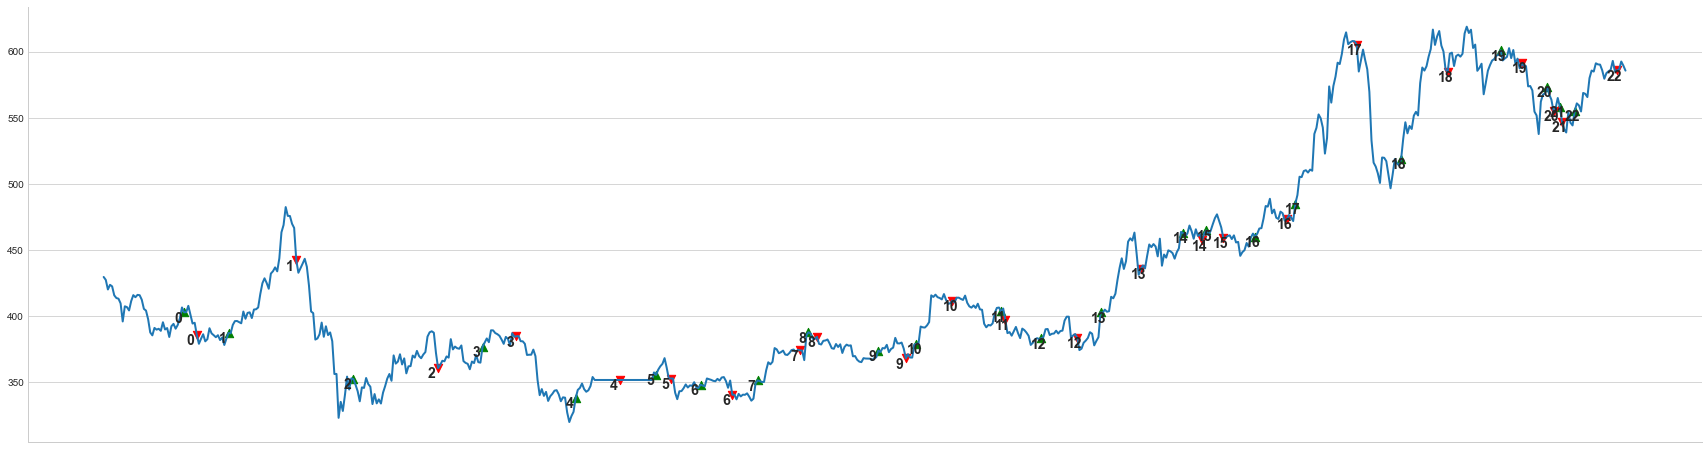

In [47]:
backtest.plot_trades()

In [35]:
df = backtest.trades

In [72]:
df.set_index('trade_start').resample('M').count()

,trade_end,peirods,time_held,buy_price,sell_price,pct_change,highest_gain,max_drawdown,current_capital,winning_trade
trade_start,,,,,,,,,,
2020-08-31 00:00:00-05:00,2,2,2,2,2,2,2,2,2,2
2020-09-30 00:00:00-05:00,4,4,4,4,4,4,4,4,4,4
2020-10-31 00:00:00-05:00,7,7,7,7,7,7,7,7,7,7
2020-11-30 00:00:00-06:00,6,6,6,6,6,6,6,6,6,6
2020-12-31 00:00:00-06:00,4,4,4,4,4,4,4,4,4,4


In [50]:
n = 12
capital = 10000
monthly_return = 0.1
for x in range(n):
    capital = capital * (1+monthly_return)
    print(capital)

11000.0
12100.000000000002
13310.000000000004
14641.000000000005
16105.100000000008
17715.61000000001
19487.171000000013
21435.888100000015
23579.47691000002
25937.424601000024
28531.16706110003
31384.283767210036
